<a href="https://colab.research.google.com/github/DEEPAK-RAMGIRI/AIML-LAB/blob/main/website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [94]:
df = pd.read_csv('website_classification.csv')

In [95]:
df.head(5)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [96]:
df.shape #(rows,col)

(1408, 4)

In [97]:
nltk.download('stopwords') # to use nltk stopwords we need to download the stopwords
nltk.download('punkt_tab') #to use the punkt libariies

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [98]:
df.columns

Index(['Unnamed: 0', 'website_url', 'cleaned_website_text', 'Category'], dtype='object')

In [99]:
df.dtypes

,0
Unnamed: 0,int64
website_url,object
cleaned_website_text,object
Category,object


In [100]:
df.head(2) # here unamed : 0  and website url not required because it will be hindrance in upcoming while train the data

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel


In [101]:
df = df.drop(["Unnamed: 0", "website_url"], axis=1)

In [102]:
df.head(2)

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel


In [103]:
pd.DataFrame(df.Category.unique()).values

array([['Travel'],
       ['Social Networking and Messaging'],
       ['News'],
       ['Streaming Services'],
       ['Sports'],
       ['Photography'],
       ['Law and Government'],
       ['Health and Fitness'],
       ['Games'],
       ['E-Commerce'],
       ['Forums'],
       ['Food'],
       ['Education'],
       ['Computers and Technology'],
       ['Business/Corporate'],
       ['Adult']], dtype=object)

In [104]:
def clean_text(text):
    tokens = word_tokenize(text.lower())
    words = [re.sub(r'[^a-z]', '', word) for word in tokens]
    stop_words = set(stopwords.words('english'))
    filtered = [w for w in words if w and w not in stop_words]
    return ' '.join(filtered)

In [105]:
df['cleaned_website_text'] = df['cleaned_website_text'].apply(clean_text)

In [106]:
label_encoder = LabelEncoder()
df['category_id'] = label_encoder.fit_transform(df['Category'])
num_classes = len(label_encoder.classes_)

In [107]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_website_text']).toarray()

In [108]:
y_encoded = df['category_id'].values.reshape(-1, 1)
one_hot_encoder = OneHotEncoder(sparse_output=False)
y = one_hot_encoder.fit_transform(y_encoded)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder

# # Assuming y_train is your target variable
# # If y_train is not one-hot encoded, one-hot encode it
# if len(np.unique(y_train)) > 2:  # For multi-class classification
#     encoder = OneHotEncoder(sparse=False)
#     y_train = encoder.fit_transform(y_train.reshape(-1, 1))

# # Activation Functions
# def relu(x):
#     return np.maximum(0, x)

# def relu_derivative(x):
#     return (x > 0).astype(float)

# def softmax(x):
#     exps = np.exp(x - np.max(x, axis=1, keepdims=True))
#     return exps / np.sum(exps, axis=1, keepdims=True)

# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def sigmoid_derivative(x):
#     return x * (1 - x)

# # Loss function (with small epsilon to prevent log(0))
# def categorical_crossentropy(y_true, y_pred):
#     epsilon = 1e-9
#     return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))

# # Initialize Neural Network Parameters
# input_neurons = X_train.shape[1]  # Number of features
# hidden_neurons = 5  # Hidden layer with 5 neurons
# output_neurons = y_train.shape[1]  # Number of categories (output neurons)

# # Initialize Weights and Biases
# np.random.seed(42)
# W1 = np.random.randn(input_neurons, hidden_neurons) * 0.01
# b1 = np.zeros((1, hidden_neurons))
# W2 = np.random.randn(hidden_neurons, output_neurons) * 0.01
# b2 = np.zeros((1, output_neurons))

# # Training Parameters
# # Adjusted learning rate
# learning_rate = 0.001  # Try lowering the learning rate

# # Increase epochs for longer training
# epochs = 5000  # Try more epochs for better convergence

# # Training Loop
# for epoch in range(epochs):
#     # Forward Propagation
#     hidden_input = np.dot(X_train, W1) + b1
#     hidden_output = relu(hidden_input)

#     final_input = np.dot(hidden_output, W2) + b2
#     final_output = softmax(final_input)

#     # Compute Loss (Categorical Cross-Entropy)
#     loss = categorical_crossentropy(y_train, final_output)
#     losses.append(loss)

#     # Backpropagation
#     error_output = final_output - y_train
#     d_output = error_output

#     error_hidden = d_output.dot(W2.T)
#     d_hidden = error_hidden * relu_derivative(hidden_output)

#     # Update Weights and Biases
#     W2 -= hidden_output.T.dot(d_output) * learning_rate
#     b2 -= np.sum(d_output, axis=0, keepdims=True) * learning_rate
#     W1 -= X_train.T.dot(d_hidden) * learning_rate
#     b1 -= np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

#     # Print loss every 500 epochs
#     if epoch % 500 == 0:
#         print(f"Epoch {epoch}, Loss: {loss:.4f}")


In [111]:
model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation='sigmoid'),  # Change activation function here
        layers.Dense(64, activation='sigmoid'),   # Change activation function here
        layers.Dense(num_classes, activation='softmax')  # Output layer remains softmax
    ])


Epoch 1/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0660 - loss: 2.8256 - val_accuracy: 0.0638 - val_loss: 2.6986
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0846 - loss: 2.6766 - val_accuracy: 0.0567 - val_loss: 2.6699
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1200 - loss: 2.6542 - val_accuracy: 0.1111 - val_loss: 2.6534
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1153 - loss: 2.6434 - val_accuracy: 0.3168 - val_loss: 2.6241
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2631 - loss: 2.5875 - val_accuracy: 0.3948 - val_loss: 2.5831
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3539 - loss: 2.5536 - val_accuracy: 0.1253 - val_loss: 2.5479
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2771 - loss: 2.4947 - val_accuracy: 0.5508 - val_loss: 2.4878
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5887 - loss: 2.4160 - val_accuracy: 0.

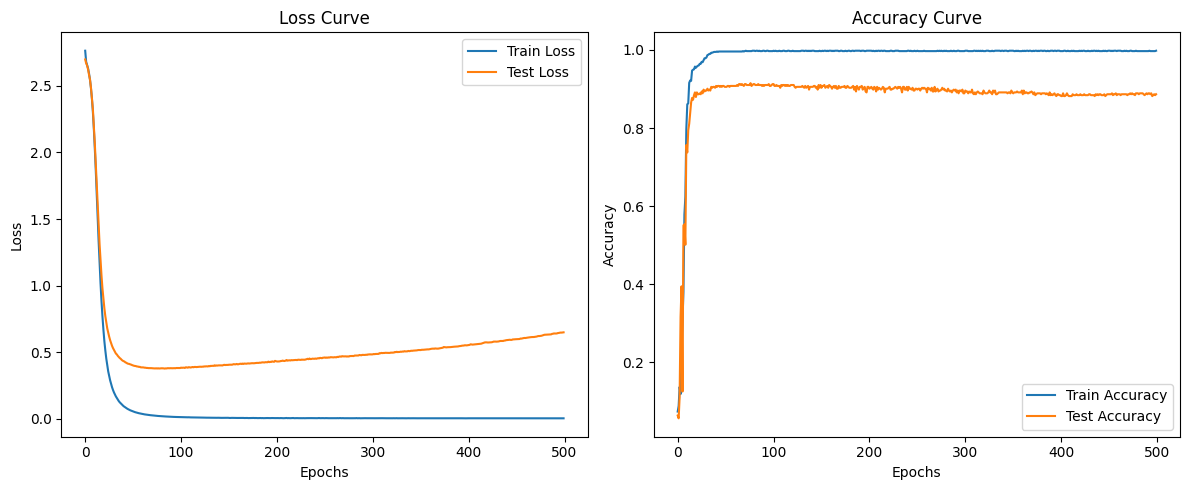

In [112]:
# model = keras.Sequential([
#     layers.Input(shape=(X_train.shape[1],)),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(num_classes, activation='softmax')
# ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- Training ---
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=500, batch_size=32, verbose=1)

# --- Evaluation ---
final_train_loss, final_train_acc = model.evaluate(X_train, y_train, verbose=0)
final_test_loss, final_test_acc = model.evaluate(X_test, y_test, verbose=0)

print("\nFinal Loss & Accuracy:")
print(f"Train Loss: {final_train_loss:.4f} | Train Accuracy: {final_train_acc:.4f}")
print(f"Test Loss: {final_test_loss:.4f} | Test Accuracy: {final_test_acc:.4f}")

# --- Plotting ---
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()